Total Population : 20
Mutation Probability: 5%
Number of cities: 20
Optimal path cost: 3.8755
Best Route: [11, 13, 3, 12, 2, 4, 20, 19, 16, 5, 9, 8, 6, 14, 15, 17, 18, 1, 7, 10]


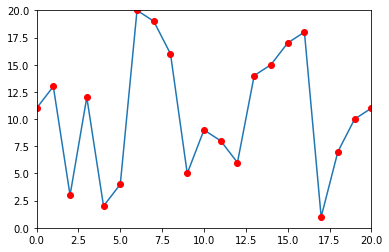

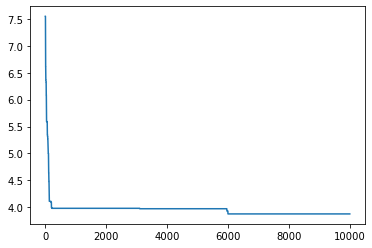

In [1]:

import random                        #To Generate a random Number
import copy                          #To create mutable objects
import math                          #To perform mathematical operations
import matplotlib.pyplot as plt       #To plot the path of the salesman

#INITIALIZATION

POPULATION_SIZE = 20                  
CITIES_SIZE = 20                     #The nummber of cities to be considered
TOUR_SIZE = 21                       #Tour size is 21 because the traveller will repeat the inital state twice
NUM_EXECUTION = 9999                #Number of states have been taken a high value to increse the accuracy
population = []                     # To store the population
x = []                              # To store the X coordinate of the city  
y = []                              # To store the Y coordinate of the city


tour = [[0 for x in range(TOUR_SIZE)] for y in range(TOUR_SIZE)]                            # To store the entire Tour of the Salesman 
dCidade = [[0 for x in range(POPULATION_SIZE)] for y in range(POPULATION_SIZE)]             #Identity matrix which will store the heuristic value 
distances = [0 for x in range(POPULATION_SIZE)]                                             #The distance between the two cities will be stored in this array   
parentsOne = None                                                                           # Parent with the highest fitness value
parentsTwo = None                                                                           # Parent with the highest fitness value
costByExecution = []                                                                        # To show the cost of traversing through graph

"""
    Generates the first population
"""
def generateFirstPopulation():                                                             #function to generate the first population
    # For each position, generates a new possible path
    for _ in range(1, POPULATION_SIZE + 1):
        generatePossiblePath()

"""
    Method called in the generateFirstPopulation() to 
    generate a new possible path for the population
"""
def generatePossiblePath():                                                                 # function to generate a set of possible path taken by the salesperson
    path = []                                                                               # To store the series of the path
    for _ in range(1, CITIES_SIZE + 1):                                                     
        # generates a new number between 1 - 20
        randomNum = random.randint(1, 20)
        # while the generated number exists in the list, generates a new one
        while(numberExistsInPath(path, randomNum)):
            randomNum = random.randint(1, 20)
        path.append(randomNum)
    population.append(path)                                                          #When all the possible cities are covered then it is appended to the population

"""
    Method to verify if the number is already in the path
"""
def numberExistsInPath(path, number):                           
    for i in path:
        if i == number:
            return True
    return False

"""
    Generates the X and Y arrays which represents the distances
    in the x and y axis used to calculate the identity matrix in the fitness function
"""
def generateXandY():                                                             #In this function we are generating the coordinate path for each tour
    for _ in range(CITIES_SIZE):                                     
        randomNumber = random.random()                                           # Generating a random number between 0 and 1 
        randomNumber = round(randomNumber, 2)                                    # Rounding the number to the 2 digits
        x.append(randomNumber)                                                   # Appending it to the array for storing the x coordinates 

        randomNumber = random.random()
        randomNumber = round(randomNumber, 2)
        y.append(randomNumber)

"""
    makes the swap between 2 cities in the path with a 5% chance of mutation
"""
def mutate(matrix):
    for i in range(0, len(matrix)):
        for _ in range(0, len(matrix[i])):
            ranNum = random.randint(1, 100)                 # Condition for handing the 5% chance of mutaion
            if ranNum >= 1 and ranNum <= 5:
                indexOne = random.randint(0, 19)            # Selection of any index
                indexTwo = random.randint(0, 19)            # Selection of any index
                auxOne = matrix[i][indexOne]                # Selecting value at that index
                auxTwo = matrix[i][indexTwo]                # Selecting value at that index
                matrix[i][indexOne] = auxTwo                # Replacing the values in the childs
                matrix[i][indexTwo] = auxOne                # Replacing the values in the childs

"""
    Generates the Tour matrix, which is the same matrix as the population,
    but with the first column duplicated at the end of it, afterall, the traveller
    always have to arrive at the same place of where he started
"""
def generateTour():
    global tour
    tour = copy.deepcopy(population)
    for ways in tour:
        first = ways[0]
        ways.append(first)

"""
    Generates an array with the sum of each path in the population array
    based on the tour matrix
"""
def calculateDistances():
    global distances
    distances = [0 for x in range(POPULATION_SIZE)]
    for i in range(len(population)):
        for j in range(len(population[i])):
            firstPos = 19 if tour[i][j] == 20 else tour[i][j]
            secondPos = 19 if tour[i][j+1] == 20 else tour[i][j+1]
            distances[i] += round(dCidade[firstPos][secondPos], 4)                    # Will store the the sum of distance of all the possible solution
    dict_dist = {i: distances[i] for i in range(0, len(distances))}
    distances = copy.deepcopy(dict_dist)
    return sorted(distances.items(), key=lambda kv: kv[1])                            # will return all the distances in a sorted manner

"""
    Generate the identity matrix (dCidade) based on the x and y arrays
    and then call the calculateDistances() method to generate the array with the sum
    of each path to user later in the cycle process
"""
def fitnessFunction():
    for i in range(len(population)):
        for j in range(len(population)):
            dCidade[i][j] = round(math.sqrt(((x[i] - x[j])**2) + ((y[i] - y[j])**2)), 4)    #calculating the Eucledian distance between the generated pair of coor.
    return calculateDistances()

"""
    Performs the roulette function, generating two arrays with 5 parents each,
    which will be used later to do the cycle process
"""
def rouletteFunction(sorted_x):
    global parentsOne
    global parentsTwo
    arr = []
    rouletteArr = []
    for i in range(10):
        arr.append(sorted_x[i][0])
    for j in range(len(arr)):
        for _ in range(10 - j):
            rouletteArr.append(arr[j])
    parentsOne = createParents(rouletteArr)                              # Will store the First Parent
    parentsTwo = createParents(rouletteArr)                              # Will store the second Parent

"""
    Auxiliary method used in the rouletteFunction() to generate the two parents array
"""
def createParents(rouletteArr):
    parentArr = []
    for _ in range(5):
        parentArr.append(rouletteArr[random.randint(0, 54)])            # Will return any one parent out of the five parents passed on by the rouletteFunction()
    return parentArr

"""
    Method used in the cycle method to see if there's any duplicated city
"""
def hasDuplicity(auxArray, usedIndexes):
    for i in range(len(auxArray)):
        for j in range(i, len(auxArray)):
            if i != j and auxArray[i] == auxArray[j]:
                if i in usedIndexes:
                    return j
                else:
                    return i
    return -1

"""
    Method that has the 'cycle' logic.
    1. For each two children in the children array, makes a random swap between
        the two children until there's no duplicated element
    2. Mutate the children that were generated
    3. Adds the children in the population array
"""
def doCycle(sorted_x):
    global population
    children = []

    for i in range(5):
        parentOneAux = parentsOne[i]                               # Store the first mutating Parent
        parentTwoAux = parentsTwo[i]                               # Store the second mutating Parent
        usedIndexes = []                                           # Keeping a track of the used indexes

        randomIndexInsideCromossomus = random.randint(0, POPULATION_SIZE - 1)             # Taking a RAndom postion to perform Swapping

        usedIndexes.append(randomIndexInsideCromossomus)                                   # Keeping a track of the used indexes

        childOne = copy.deepcopy(population[parentOneAux])                                 # creating the first child
        childTwo = copy.deepcopy(population[parentTwoAux])                                 # creating the second child

        valAuxOne = childOne[randomIndexInsideCromossomus]                                 # Taking the value at that index
        valAuxTwo = childTwo[randomIndexInsideCromossomus]                                 # Taking the value at the second index

        childOne[randomIndexInsideCromossomus] = valAuxTwo                                 # Replacing both the values
        childTwo[randomIndexInsideCromossomus] = valAuxOne                                 # Replacing both the values

        while(hasDuplicity(childOne, usedIndexes) != -1):                                  # Checks wether the replaced value already exists in the path or not
            newIndex = hasDuplicity(childOne, usedIndexes)                                 # Extracts the location where the repetition is taking place
            usedIndexes.append(newIndex)                                                   # Appending it into the used indexes

            valAuxOne = childOne[newIndex]                                                 # Replacing the position with their original values 
            valAuxTwo = childTwo[newIndex]                                                 # Replacing the position with their original values  

            childOne[newIndex] = valAuxTwo                                                  # Replacing the position with their original values
            childTwo[newIndex] = valAuxOne                                                  # Replacing the position with their original values 

        # After generating the children, add them in the children's array
        children.append(childOne)                                                           # Adding the newly generated paths in a childrens array
        children.append(childTwo)                                                           # Adding the newly generated paths in a childrens array

    # Mutate the children array
    mutate(children)                                                                        # Performing mutation in the pathes taken by the salesman

    # Make a temp copy of the population before changing it                        
    tempPop = copy.deepcopy(population)                                                     # Making a copy of the existing population

    for i in range(10):
        population[i] = copy.deepcopy(tempPop[sorted_x[i][0]])                             # Taking the best first 10 of the previous population

    # Adjust the population
    for j in range(10, POPULATION_SIZE):
        population[j] = copy.deepcopy(children[j - 10])                                   # Rest of the 10 are the children of the first 10 
                                                                                          # The population got modified

def main():
    # Runs only once. Generates the population, x and y, and tour matrix
    generateFirstPopulation()                                                             # Generates the first Population
    generateXandY()                                                                       # Generates the x and y coordinates of the newly generated population
    generateTour()                                                                        # Generates the tour

    # Runs in a loop 0 - 9999.                                                            # we are Making 9999 iterations to get the most optimal paths
    for _ in range(NUM_EXECUTION):
        sorted_x = fitnessFunction()                                                      # THe array containing the heuristic value of each solution
        rouletteFunction(sorted_x)                                                        # making a selection of the 10 best parents or paths according to the costs 
        doCycle(sorted_x)
        generateTour()                                                                    # Generate the Tour matrix again, as the population is updated
        costByExecution.append(sorted_x[0][1])                                            # Appends the cost to the array of costs (plotted at the end)

                                                                                        # Generates the fitness values for the last population
    sorted_x = fitnessFunction()                                                        # Which also the most optimal path that we wanted

    print('Total Population : %s' % (POPULATION_SIZE))
    print('Mutation Probability: 5%')
    print('Number of cities: %s' % (CITIES_SIZE))
    print('Optimal path cost: %s' % sorted_x[0][1])
    print('Best Route: %s' % population[0])

    # Show the path graph
    plt.plot(tour[0])
    plt.plot(tour[0], 'ro')                                                             # Plot to show the path taken by the salesman
    plt.axis([0, 20, 0, 20])
    plt.show()

    # Show the cost graph
    plt.plot(costByExecution)                                                          # The cost involved 
    plt.show()

if __name__ == "__main__":
    main()